# Library

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import AutoMinorLocator
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn import preprocessing
from astroML.utils import completeness_contamination
from sklearn.metrics import precision_recall_curve, roc_curve
from astroML.utils import split_samples, completeness_contamination
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve#
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import itertools
import datetime
from pandas.plotting import scatter_matrix

# Load File

In [2]:
big_frame = pd.read_csv("big_frame_1.csv")
type_ID = big_frame['type_ID']
# big_frame = big_frame.drop(big_frame.loc[:,'type_ID'].head(0).columns, axis=1)
big_frame.drop('type_ID', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(big_frame,type_ID, random_state=None)
# Create standardizer
standardizer = StandardScaler()
standardizer.fit(X_train)
# Standardize features
X_std_train = standardizer.fit_transform(X_train)
X_std_test = standardizer.fit_transform(X_test)
# Standardize features
minmax = MinMaxScaler()
minmax.fit(X_train)
X_mm_train = minmax.fit_transform(X_train)
X_mm_test = minmax.fit_transform(X_test)

# Function

In [3]:
def print_score (y_test,y_pred,time1,time2):
    print("comfusion matrix = ")
    print(confusion_matrix(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    
    print("")
    accuracy = accuracy_score(y_test, y_pred)
    print('accuracy_score = ', accuracy)

#In multilabel classification, 
#this function computes subset accuracy: the set of labels predicted for 
#a sample must exactly match the corresponding set of labels in y_true     
    
    print("")
    completeness, contamination = completeness_contamination(y_pred, y_test)
    print ("completeness = ", completeness)
    print ("contamination = ", contamination)
    
#completeness = true positives/true positives + false negatives,
#contamination = false positives/true positives + false positives.
#The completeness measures the fraction of total detections identified by our classifier,
#while the contamination measures the fraction of detected objects which are misclassified

# Depending on the nature of the problem and the goal of the classification,
# we may wish to optimize one or the other.
# Alternative names for these measures abound: in some fields the completeness
# and contamination are respectively referred to as the “sensitivity” and the “Type I
# error.” In astronomy, one minus the contamination is often referred to as the
# “efficiency.” In machine learning communities, the efficiency and completeness are
# respectively referred to as the “precision” and “recall.”

    print("")
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print ("precision score = ", precision)
    print ("recall score = ", recall)

#precision An interesting one to look at is the accuracy of the positive pre‐ dictions; this is called the precision of the classifier 
# recall, also called sensitivity or true positive rate (TPR): this is the ratio of positive instances that are correctly detected by the classifier
#precision = TP/TP + FP
#recall = TP/TP + FN
    
    print("")
    f1 = f1_score(y_test, y_pred)
    print ("F1 score = ", f1)
    
#The F1 score is the harmonic mean of precision and recall (Equation 3-3). 
#Whereas the regular mean treats all values equally, 
#the harmonic mean gives much more weight to low values.

    print("")
    print ("time span= ", time2 - time1)

In [4]:
def score (y_test,y_pred,time1,time2):
    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    completeness, contamination = completeness_contamination(y_pred, y_test)
    completeness = np.max(completeness)
    contamination = np.max(contamination)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    time = time2 - time1
    return(cm,accuracy,completeness,contamination,precision,recall,f1,time)

In [5]:
feature= ['Width','Height','Orientation','Eccentricity','Variance_x','Variance_y','Covariance','Intensity_x',
                     'mean_x','sigma_x','RMS_x','Intensity_y','mean_y','sigma_y','RMS_y',
                     'psfMag_u','psfMag_g','psfMag_r','psfMag_i','psfMag_z',
                     'psfMagErr_u','psfMagErr_g','psfMagErr_r','psfMagErr_i','psfMagErr_z',
                     'cModelMag_u','cModelMag_g','cModelMag_r','cModelMag_i','cModelMag_z',
                     'cModelMagErr_u','cModelMagErr_g','cModelMagErr_r','cModelMagErr_i',
                     'cModelMagErr_z','petroMag_u','petroMag_g','petroMag_r','petroMag_i','petroMag_z',
                     'petroMagErr_u','petroMagErr_g','petroMagErr_r','petroMagErr_i','petroMagErr_z',
                     'psf-cM_Mag_u','psf-cM_Mag_g','psf-cM_Mag_r','psf-cM_Mag_i','psf-cM_Mag_z']

# ANN with sklearn

### solver = lbfgs

In [6]:
time1_nn_0 = datetime.datetime.now()
nn_0 = MLPClassifier(solver='lbfgs',random_state=None, activation='relu',
                     learning_rate_init=0.001,learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_0 = nn_0.fit(X_std_train, y_train)
y_nn_0 = model_nn_0.predict(X_std_test)
y_probs_nn_0 = model_nn_0.predict_proba(X_std_test)[:, 1]
time2_nn_0 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_0.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_0.score(X_std_test, y_test)))
print_score(y_test,y_nn_0,time1_nn_0,time2_nn_0)

Accuracy on training set: 0.99
Accuracy on test set: 0.96
comfusion matrix = 
[[2731   80]
 [ 179 4103]]

accuracy_score =  0.9634851261807416

completeness =  0.958197104156936
contamination =  0.01912502988285919

precision score =  0.9808749701171408
recall score =  0.958197104156936

F1 score =  0.9694034258712345

time span=  0:00:02.733829


In [7]:
time1_nn_1 = datetime.datetime.now()
nn_1 = MLPClassifier(solver='lbfgs',random_state=None, activation='identity',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_1 = nn_1.fit(X_std_train, y_train)
y_nn_1 = model_nn_1.predict(X_std_test)
y_probs_nn_1 = model_nn_1.predict_proba(X_std_test)[:, 1]
time2_nn_1 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_1.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_1.score(X_std_test, y_test)))
print_score(y_test,y_nn_1,time1_nn_1,time2_nn_1)

Accuracy on training set: 0.71
Accuracy on test set: 0.70
comfusion matrix = 
[[2479  332]
 [1769 2513]]

accuracy_score =  0.7037924714507261

completeness =  0.5868752919196637
contamination =  0.11669595782073813

precision score =  0.8833040421792618
recall score =  0.5868752919196637

F1 score =  0.7052055563350638

time span=  0:00:00.029413


In [8]:
time1_nn_2 = datetime.datetime.now()
nn_2 = MLPClassifier(solver='lbfgs',random_state=None, activation='logistic',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_2 = nn_2.fit(X_std_train, y_train)
y_nn_2 = model_nn_2.predict(X_std_test)
y_probs_nn_2 = model_nn_2.predict_proba(X_std_test)[:, 1]
time2_nn_2 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_2.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_2.score(X_std_test, y_test)))
print_score(y_test,y_nn_2,time1_nn_2,time2_nn_2)

Accuracy on training set: 0.99
Accuracy on test set: 0.96
comfusion matrix = 
[[2750   61]
 [ 206 4076]]

accuracy_score =  0.9623572536303397

completeness =  0.9518916394208314
contamination =  0.014744984288131497

precision score =  0.9852550157118685
recall score =  0.9518916394208314

F1 score =  0.9682860197173061

time span=  0:00:02.069469


In [9]:
time1_nn_3 = datetime.datetime.now()
nn_3 = MLPClassifier(solver='lbfgs',random_state=None, activation='tanh',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_3 = nn_3.fit(X_std_train, y_train)
y_nn_3 = model_nn_3.predict(X_std_test)
y_probs_nn_3 = model_nn_3.predict_proba(X_std_test)[:, 1]
time2_nn_3 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_3.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_3.score(X_std_test, y_test)))
print_score(y_test,y_nn_3,time1_nn_3,time2_nn_3)

Accuracy on training set: 0.99
Accuracy on test set: 0.97
comfusion matrix = 
[[2756   55]
 [ 162 4120]]

accuracy_score =  0.969406457070351

completeness =  0.9621672115833723
contamination =  0.013173652694610778

precision score =  0.9868263473053892
recall score =  0.9621672115833723

F1 score =  0.974340782783493

time span=  0:00:02.747875


### solver = sgd

In [10]:
time1_nn_4 = datetime.datetime.now()
nn_4 = MLPClassifier(solver='sgd',random_state=None, activation='relu',
                     learning_rate_init=0.1, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_4 = nn_4.fit(X_std_train, y_train)
y_nn_4 = model_nn_4.predict(X_std_test)
y_probs_nn_4 = model_nn_4.predict_proba(X_std_test)[:, 1]
time2_nn_4 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_4.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_4.score(X_std_test, y_test)))
print_score(y_test,y_nn_4,time1_nn_4,time2_nn_4)

Accuracy on training set: 0.98
Accuracy on test set: 0.97
comfusion matrix = 
[[2732   79]
 [ 145 4137]]

accuracy_score =  0.9684195685887494

completeness =  0.9661373190098085
contamination =  0.018738140417457305

precision score =  0.9812618595825426
recall score =  0.9661373190098085

F1 score =  0.9736408566721582

time span=  0:00:01.614016


In [11]:
time1_nn_5 = datetime.datetime.now()
nn_5 = MLPClassifier(solver='sgd',random_state=None, activation='identity',
                     learning_rate_init=0.1, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_5 = nn_5.fit(X_std_train, y_train)
y_nn_5 = model_nn_5.predict(X_std_test)
y_probs_nn_5 = model_nn_5.predict_proba(X_std_test)[:, 1]
time2_nn_5 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_5.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_5.score(X_std_test, y_test)))
print_score(y_test,y_nn_5,time1_nn_5,time2_nn_5)

Accuracy on training set: 0.97
Accuracy on test set: 0.96
comfusion matrix = 
[[2636  175]
 [  91 4191]]

accuracy_score =  0.96249823769914

completeness =  0.9787482484820178
contamination =  0.04008245533669263

precision score =  0.9599175446633074
recall score =  0.9787482484820178

F1 score =  0.969241443108233

time span=  0:00:00.617855


In [12]:
time1_nn_6 = datetime.datetime.now()
nn_6 = MLPClassifier(solver='sgd',random_state=None, activation='logistic',
                     learning_rate_init=0.1, learning_rate= 'constant',
                     hidden_layer_sizes=(100,), alpha=0.1)
model_nn_6 = nn_6.fit(X_std_train, y_train)
y_nn_6 = model_nn_6.predict(X_std_test)
y_probs_nn_6 = model_nn_6.predict_proba(X_std_test)[:, 1]
time2_nn_6 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_6.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_6.score(X_std_test, y_test)))
print_score(y_test,y_nn_6,time1_nn_6,time2_nn_6)

Accuracy on training set: 0.98
Accuracy on test set: 0.98
comfusion matrix = 
[[2736   75]
 [  98 4184]]

accuracy_score =  0.975609756097561

completeness =  0.9771134983652499
contamination =  0.017609767551068325

precision score =  0.9823902324489316
recall score =  0.9771134983652499

F1 score =  0.9797447605666785

time span=  0:00:06.641731


In [13]:
time1_nn_7 = datetime.datetime.now()
nn_7 = MLPClassifier(solver='sgd',random_state=None, activation='tanh',
                     learning_rate_init=0.1, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_7 = nn_7.fit(X_std_train, y_train)
y_nn_7 = model_nn_7.predict(X_std_test)
y_probs_nn_7 = model_nn_7.predict_proba(X_std_test)[:, 1]
time2_nn_7 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_7.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_7.score(X_std_test, y_test)))
print_score(y_test,y_nn_7,time1_nn_7,time2_nn_7)

Accuracy on training set: 0.98
Accuracy on test set: 0.97
comfusion matrix = 
[[2751   60]
 [ 143 4139]]

accuracy_score =  0.9713802340335542

completeness =  0.9666043904717422
contamination =  0.01428911645629912

precision score =  0.9857108835437008
recall score =  0.9666043904717422

F1 score =  0.9760641433793185

time span=  0:00:01.891377


In [14]:
time1_nn_8 = datetime.datetime.now()
nn_8 = MLPClassifier(solver='sgd',random_state=None, activation='relu',
                     learning_rate_init=0.1, learning_rate= 'adaptive',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_8 = nn_8.fit(X_std_train, y_train)
y_nn_8 = model_nn_8.predict(X_std_test)
y_probs_nn_8 = model_nn_8.predict_proba(X_std_test)[:, 1]
time2_nn_8 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_8.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_8.score(X_std_test, y_test)))
print_score(y_test,y_nn_8,time1_nn_8,time2_nn_8)

Accuracy on training set: 0.98
Accuracy on test set: 0.97
comfusion matrix = 
[[2757   54]
 [ 151 4131]]

accuracy_score =  0.9710982658959537

completeness =  0.9647361046240075
contamination =  0.012903225806451613

precision score =  0.9870967741935484
recall score =  0.9647361046240075

F1 score =  0.9757883547891815

time span=  0:00:05.141861


In [15]:
time1_nn_9 = datetime.datetime.now()
nn_9 = MLPClassifier(solver='sgd',random_state=None, activation='identity',
                     learning_rate_init=0.1, learning_rate= 'adaptive',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_9 = nn_9.fit(X_std_train, y_train)
y_nn_9 = model_nn_9.predict(X_std_test)
y_probs_nn_9 = model_nn_9.predict_proba(X_std_test)[:, 1]
time2_nn_9 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_9.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_9.score(X_std_test, y_test)))
print_score(y_test,y_nn_9,time1_nn_9,time2_nn_9)

Accuracy on training set: 0.97
Accuracy on test set: 0.97
comfusion matrix = 
[[2694  117]
 [  93 4189]]

accuracy_score =  0.9703933455519527

completeness =  0.9782811770200841
contamination =  0.02717138875986995

precision score =  0.9728286112401301
recall score =  0.9782811770200841

F1 score =  0.9755472752678156

time span=  0:00:02.933053


In [16]:
time1_nn_10 = datetime.datetime.now()
nn_10 = MLPClassifier(solver='sgd',random_state=None, activation='logistic',
                     learning_rate_init=0.1, learning_rate= 'adaptive',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_10 = nn_10.fit(X_std_train, y_train)
y_nn_10 = model_nn_10.predict(X_std_test)
y_probs_nn_10 = model_nn_10.predict_proba(X_std_test)[:, 1]
time2_nn_10 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_10.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_10.score(X_std_test, y_test)))
print_score(y_test,y_nn_10,time1_nn_10,time2_nn_10)

Accuracy on training set: 0.98
Accuracy on test set: 0.98
comfusion matrix = 
[[2747   64]
 [ 107 4175]]

accuracy_score =  0.9758917242351615

completeness =  0.9750116767865483
contamination =  0.01509790044821892

precision score =  0.9849020995517811
recall score =  0.9750116767865483

F1 score =  0.9799319328717288

time span=  0:00:03.703980


In [17]:
time1_nn_11 = datetime.datetime.now()
nn_11 = MLPClassifier(solver='sgd',random_state=None, activation='tanh',
                     learning_rate_init=0.1, learning_rate= 'adaptive',
                     hidden_layer_sizes=(10,), alpha=0.1)
model_nn_11 = nn_11.fit(X_std_train, y_train)
y_nn_11 = model_nn_11.predict(X_std_test)
y_probs_nn_11 = model_nn_11.predict_proba(X_std_test)[:, 1]
time2_nn_11 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_11.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_11.score(X_std_test, y_test)))
print_score(y_test,y_nn_11,time1_nn_11,time2_nn_11)

Accuracy on training set: 0.98
Accuracy on test set: 0.97
comfusion matrix = 
[[2763   48]
 [ 148 4134]]

accuracy_score =  0.9723671225151558

completeness =  0.9654367118169079
contamination =  0.011477761836441894

precision score =  0.9885222381635581
recall score =  0.9654367118169079

F1 score =  0.976843100189036

time span=  0:00:05.822803


### solver = adam

In [18]:
time1_nn_12 = datetime.datetime.now()
nn_12 = MLPClassifier(solver='adam',random_state=None, activation='relu',
                     learning_rate_init=0.001 , learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001 )
model_nn_12 = nn_12.fit(X_std_train, y_train)
y_nn_12 = model_nn_12.predict(X_std_test)
y_probs_nn_12 = model_nn_12.predict_proba(X_std_test)[:, 1]
time2_nn_12 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_12.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_12.score(X_std_test, y_test)))
print_score(y_test,y_nn_12,time1_nn_12,time2_nn_12)

Accuracy on training set: 0.99
Accuracy on test set: 0.95
comfusion matrix = 
[[2712   99]
 [ 287 3995]]

accuracy_score =  0.945580149443113

completeness =  0.9329752452125175
contamination =  0.02418172936003908

precision score =  0.975818270639961
recall score =  0.9329752452125175

F1 score =  0.9539159503342884

time span=  0:00:07.498971


E:\program\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [19]:
time1_nn_13 = datetime.datetime.now()
nn_13 = MLPClassifier(solver='adam',random_state=None, activation='identity',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_13 = nn_13.fit(X_std_train, y_train)
y_nn_13 = model_nn_13.predict(X_std_test)
y_probs_nn_13 = model_nn_13.predict_proba(X_std_test)[:, 1]
time2_nn_13 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_13.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_13.score(X_std_test, y_test)))
print_score(y_test,y_nn_13,time1_nn_13,time2_nn_13)

Accuracy on training set: 0.97
Accuracy on test set: 0.96
comfusion matrix = 
[[2689  122]
 [ 129 4153]]

accuracy_score =  0.9646129987311434

completeness =  0.9698738907052779
contamination =  0.02853801169590643

precision score =  0.9714619883040936
recall score =  0.9698738907052779

F1 score =  0.9706672899380624

time span=  0:00:00.713640


In [20]:
time1_nn_14 = datetime.datetime.now()
nn_14 = MLPClassifier(solver='adam',random_state=None, activation='logistic',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_14 = nn_14.fit(X_std_train, y_train)
y_nn_14 = model_nn_14.predict(X_std_test)
y_probs_nn_14 = model_nn_14.predict_proba(X_std_test)[:, 1]
time2_nn_14 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_14.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_14.score(X_std_test, y_test)))
print_score(y_test,y_nn_14,time1_nn_14,time2_nn_14)

Accuracy on training set: 0.98
Accuracy on test set: 0.96
comfusion matrix = 
[[2683  128]
 [ 124 4158]]

accuracy_score =  0.9644720146623431

completeness =  0.9710415693601121
contamination =  0.029864675688287448

precision score =  0.9701353243117126
recall score =  0.9710415693601121

F1 score =  0.9705882352941176

time span=  0:00:06.361663


E:\program\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [21]:
time1_nn_15 = datetime.datetime.now()
nn_15 = MLPClassifier(solver='adam',random_state=None, activation='tanh',
                     learning_rate_init=0.001, learning_rate= 'constant',
                     hidden_layer_sizes=(10,), alpha=0.0001)
model_nn_15 = nn_15.fit(X_std_train, y_train)
y_nn_15 = model_nn_15.predict(X_std_test)
y_probs_nn_15 = model_nn_15.predict_proba(X_std_test)[:, 1]
time2_nn_15 = datetime.datetime.now()

print("Accuracy on training set: {:.2f}".format(model_nn_15.score(X_std_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model_nn_15.score(X_std_test, y_test)))
print_score(y_test,y_nn_15,time1_nn_15,time2_nn_15)

Accuracy on training set: 0.99
Accuracy on test set: 0.96
comfusion matrix = 
[[2656  155]
 [ 151 4131]]

accuracy_score =  0.956858874947131

completeness =  0.9647361046240075
contamination =  0.03616425571628558

precision score =  0.9638357442837144
recall score =  0.9647361046240075

F1 score =  0.9642857142857143

time span=  0:00:06.856493


E:\program\python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


## Feature Importance

In [ ]:
# Calculate feature importances
importances = model_ada_6.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [feature[i] for i in indices]
# Create plot
plt.figure(figsize=(8,12))
# Create plot title
plt.title("Feature Importance")
# Add bars
plt.bar(range(X_train.shape[1]), importances[indices])
# Add feature names as x-axis labels
plt.xticks(range(X_train.shape[1]), names, rotation=90)
# Show plot
plt.show()

## Cross-validation

In [31]:
scores = cross_val_score(tree_ent, X_train, y_train,scoring="accuracy", cv=10)
print(scores)
print("Average cross-validation score: {:.2f}".format(scores.mean()))
scores = pd.DataFrame(scores)
display(scores)

[0.97886332 0.98027243 0.9769845  0.96991067 0.977433   0.96897038
 0.9783733  0.97320169 0.97508228 0.97273155]
Average cross-validation score: 0.98


,0
0,0.978863
1,0.980272
2,0.976984
3,0.969911
4,0.977433
5,0.968970
6,0.978373
7,0.973202
8,0.975082
9,0.972732


## Confusion Matrix

<IPython.core.display.Javascript object>


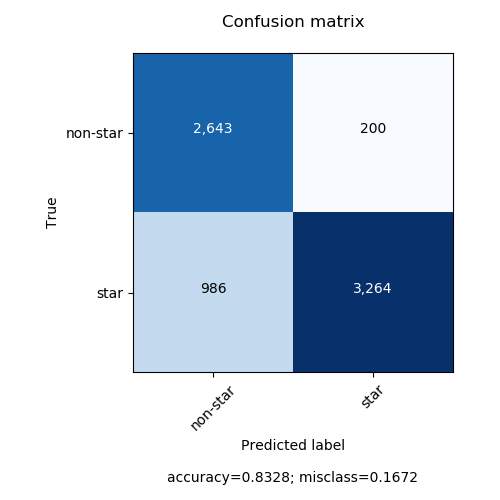

In [16]:
labels = ["non-star", "star"]
cms = confusion_matrix(y_test, y_nb_3)
accuracy = np.trace(cms) / float(np.sum(cms))
misclass = 1 - accuracy

figs = plt.figure(figsize=(5, 5))
cmap = plt.get_cmap('Blues')
plt.imshow(cms, interpolation='nearest', cmap=cmap)
plt.title('Confusion matrix\n')
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels , rotation=45)
plt.yticks(tick_marks, labels)
plt.ylim(len(cms)-0.5, -0.5)
# plt.colorbar()

thresh = cms.max() / 2
for i, j in itertools.product(range(cms.shape[0]), range(cms.shape[1])):
    plt.text(j, i, "{:,}".format(cms[i, j]), horizontalalignment="center",
             color="white" if cms[i, j] > thresh else "black")

plt.xlabel('Predicted label\n\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.ylabel('True')
plt.tight_layout()
plt.show()

## plot weight

In [ ]:
plt.figure(figsize=(20, 10))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(50), feature)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### Result

In [23]:
score_nn_0 = score(y_test,y_nn_0,time1_nn_0 ,time2_nn_0)
score_nn_1 = score(y_test,y_nn_1,time1_nn_1 ,time2_nn_1)
score_nn_2 = score(y_test,y_nn_2,time1_nn_2 ,time2_nn_2)
score_nn_3 = score(y_test,y_nn_3,time1_nn_3 ,time2_nn_3)
score_nn_4 = score(y_test,y_nn_4,time1_nn_4 ,time2_nn_4)
score_nn_5 = score(y_test,y_nn_5,time1_nn_5 ,time2_nn_5)
score_nn_6 = score(y_test,y_nn_6,time1_nn_6 ,time2_nn_6)
score_nn_7 = score(y_test,y_nn_7,time1_nn_7 ,time2_nn_7)
score_nn_8 = score(y_test,y_nn_8,time1_nn_8 ,time2_nn_8)
score_nn_9 = score(y_test,y_nn_9,time1_nn_9 ,time2_nn_9)
score_nn_10 = score(y_test,y_nn_10,time1_nn_10 ,time2_nn_10)
score_nn_11 = score(y_test,y_nn_11,time1_nn_11 ,time2_nn_11)
score_nn_12 = score(y_test,y_nn_12,time1_nn_12 ,time2_nn_12)
score_nn_13 = score(y_test,y_nn_13,time1_nn_13 ,time2_nn_13)
score_nn_14 = score(y_test,y_nn_14,time1_nn_14 ,time2_nn_14)
score_nn_15 = score(y_test,y_nn_15,time1_nn_15 ,time2_nn_15)

In [24]:
m1_t = pd.DataFrame({
 'accuracy' : [score_nn_0[1],score_nn_1[1],score_nn_2 [1],score_nn_3[1],score_nn_4[1],score_nn_5[1],score_nn_6[1],score_nn_7[1],score_nn_8[1],score_nn_9[1],score_nn_10[1],score_nn_11[1],score_nn_12[1],score_nn_13[1],score_nn_14[1],score_nn_15[1]],
 'completeness' : [score_nn_0[2],score_nn_1[2],score_nn_2 [2],score_nn_3[2],score_nn_4[2],score_nn_5[2],score_nn_6[2],score_nn_7[2],score_nn_8[2],score_nn_9[2],score_nn_10[2],score_nn_11[2],score_nn_12[2],score_nn_13[2],score_nn_14[2],score_nn_15[2]],
 'contamination' : [score_nn_0[3],score_nn_1[3],score_nn_2 [3],score_nn_3[3],score_nn_4[3],score_nn_5[3],score_nn_6[3],score_nn_7[3],score_nn_8[3],score_nn_9[3],score_nn_10[3],score_nn_11[3],score_nn_12[3],score_nn_13[3],score_nn_14[3],score_nn_15[3]],
 'precision' : [score_nn_0[4],score_nn_1[4],score_nn_2 [4],score_nn_3[4],score_nn_4[4],score_nn_5[4],score_nn_6[4],score_nn_7[4],score_nn_8[4],score_nn_9[4],score_nn_10[4],score_nn_11[4],score_nn_12[4],score_nn_13[4],score_nn_14[4],score_nn_15[4]],
 'recall' : [score_nn_0[5],score_nn_1[5],score_nn_2 [5],score_nn_3[5],score_nn_4[5],score_nn_5[5],score_nn_6[5],score_nn_7[5],score_nn_8[5],score_nn_9[5],score_nn_10[5],score_nn_11[5],score_nn_12[5],score_nn_13[5],score_nn_14[5],score_nn_15[5]],
 'F1 score' : [score_nn_0[6],score_nn_1[6],score_nn_2 [6],score_nn_3[6],score_nn_4[6],score_nn_5[6],score_nn_6[6],score_nn_7[6],score_nn_8[6],score_nn_9[6],score_nn_10[6],score_nn_11[6],score_nn_12[6],score_nn_13[6],score_nn_14[6],score_nn_15[6]],
 'time span' : [score_nn_0[7],score_nn_1[7],score_nn_2 [7],score_nn_3[7],score_nn_4[7],score_nn_5[7],score_nn_6[7],score_nn_7[7],score_nn_8[7],score_nn_9[7],score_nn_10[7],score_nn_11[7],score_nn_12[7],score_nn_13[7],score_nn_14[7],score_nn_15[7]]
                })

m1_t.rename(index = {0: "score_nn_0", 
                     1: "score_nn_1",
                     2: "score_nn_2",
                     3: "score_nn_3",
                     4: "score_nn_4",
                     5: "score_nn_5",
                     6: "score_nn_6",
                     7: "score_nn_7",
                     8: "score_nn_8",
                     9: "score_nn_9",
					 10: "score_nn_10",
					 11: "score_nn_11",
					 12: "score_nn_12",
					 13: "score_nn_13",
					 14: "score_nn_14",
					 15: "score_nn_15"
                    },inplace = True)
m1_t

,accuracy,completeness,contamination,precision,recall,F1 score,time span
score_nn_0,0.963485,0.958197,0.019125,0.980875,0.958197,0.969403,00:00:02.733829
score_nn_1,0.703792,0.586875,0.116696,0.883304,0.586875,0.705206,00:00:00.029413
score_nn_2,0.962357,0.951892,0.014745,0.985255,0.951892,0.968286,00:00:02.069469
score_nn_3,0.969406,0.962167,0.013174,0.986826,0.962167,0.974341,00:00:02.747875
score_nn_4,0.968420,0.966137,0.018738,0.981262,0.966137,0.973641,00:00:01.614016
score_nn_5,0.962498,0.978748,0.040082,0.959918,0.978748,0.969241,00:00:00.617855
score_nn_6,0.975610,0.977113,0.017610,0.982390,0.977113,0.979745,00:00:06.641731
score_nn_7,0.971380,0.966604,0.014289,0.985711,0.966604,0.976064,00:00:01.891377
score_nn_8,0.971098,0.964736,0.012903,0.987097,0.964736,0.975788,00:00:05.141861
score_nn_9,0.970393,0.978281,0.027171,0.972829,0.978281,0.975547,00:00:02.933053


<IPython.core.display.Javascript object>


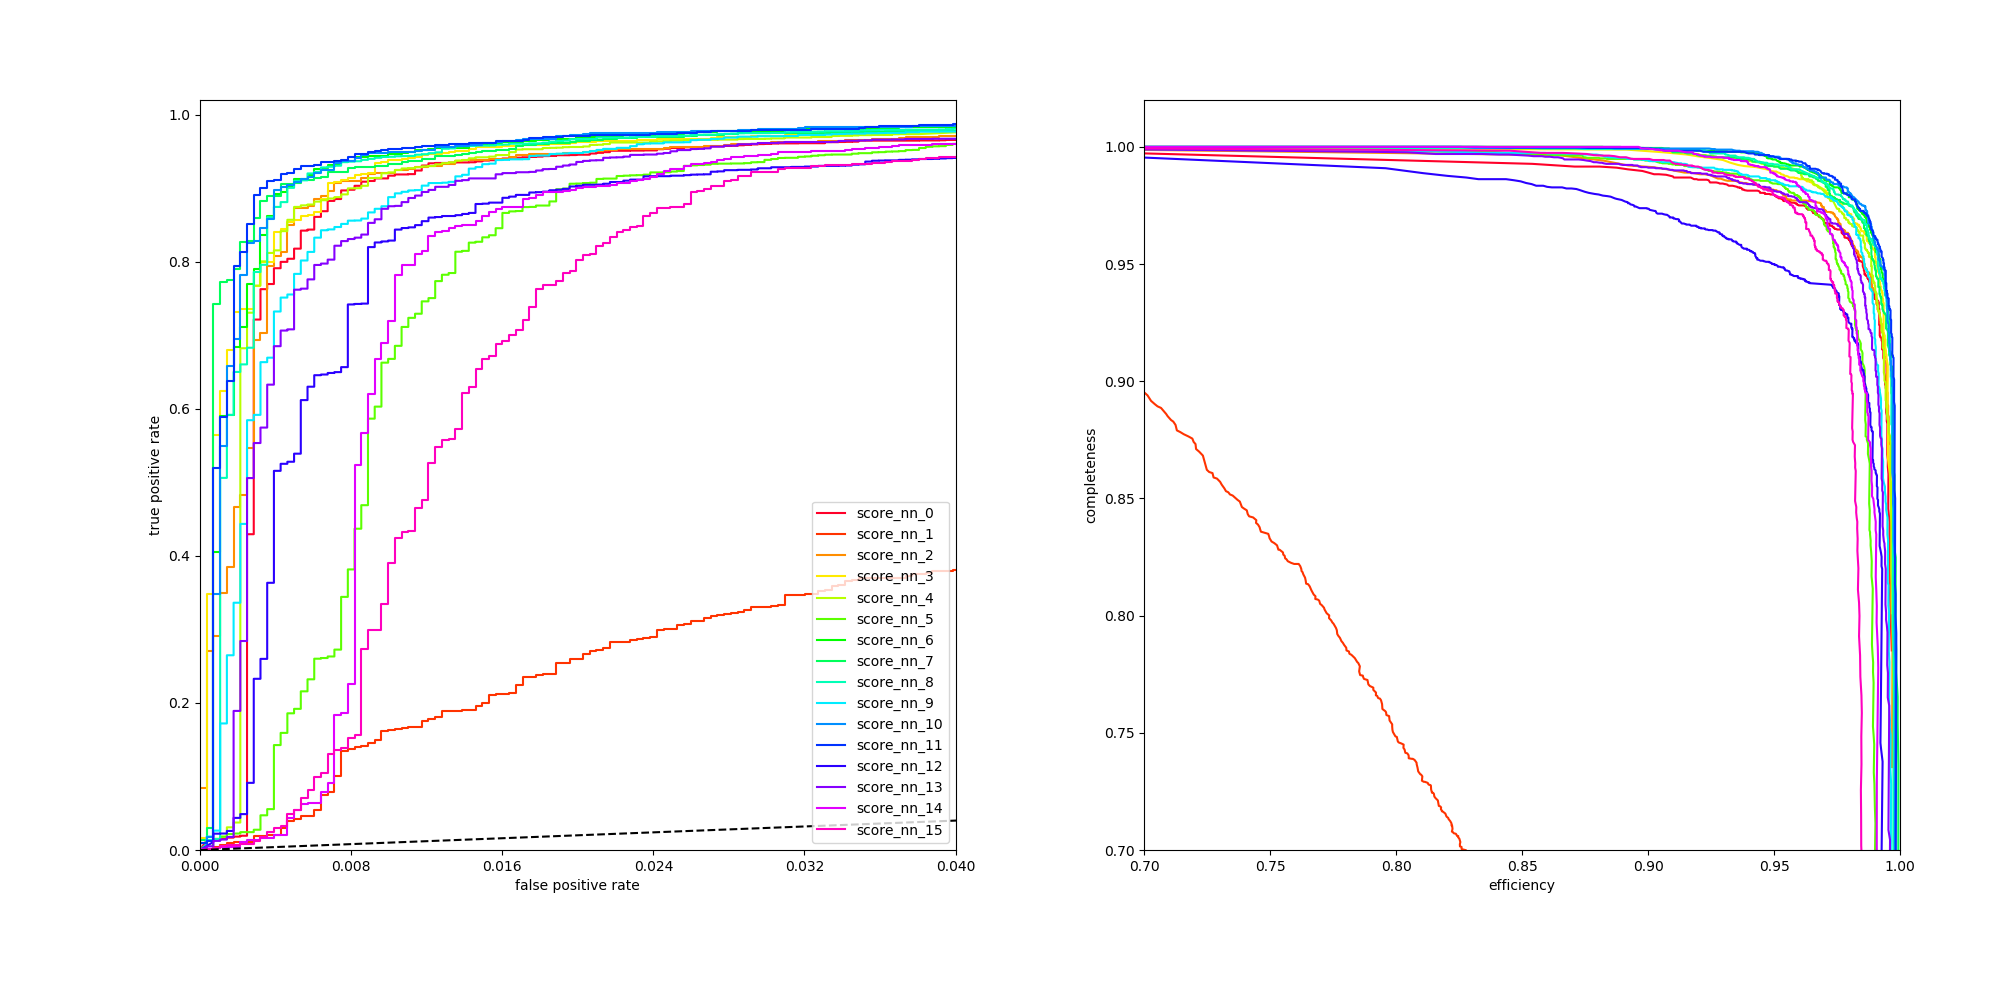

In [27]:
#------------------------------------------------------------
# Plot ROC curves and completeness/efficiency
fig = plt.figure(figsize=(20, 10))
fig.subplots_adjust(left=0.1, right=0.95, bottom=0.15, top=0.9, wspace=0.25)

# ax2 will show roc curves
ax1 = plt.subplot(121)

# ax1 will show completeness/efficiency
ax2 = plt.subplot(122)


thresholds = np.linspace(0, 1, 1001)[:-1]

names_model = list(m1_t.index)
probs_model = [y_probs_nn_0,y_probs_nn_1,y_probs_nn_2,y_probs_nn_3,y_probs_nn_4,y_probs_nn_5,y_probs_nn_6,y_probs_nn_7,y_probs_nn_8,y_probs_nn_9,y_probs_nn_10,y_probs_nn_11,y_probs_nn_12,y_probs_nn_13,y_probs_nn_14,y_probs_nn_15]
# colors = cm.nipy_spectral(np.linspace(0, 1, len(list(m1_t.index))))
colors = cm.gist_rainbow(np.linspace(0, 1, len(names_model)))
# colors = cm.tab20(np.linspace(0, 1, len(names_model)))

for name, y_prob, c in zip(names_model, probs_model, colors):
    fpr, tpr, thresh = roc_curve(y_test, y_prob)

    # add (0, 0) as first point
    fpr = np.concatenate([[0], fpr])
    tpr = np.concatenate([[0], tpr])

    ax1.plot(fpr, tpr, label=name,color=c)

    comp = np.zeros_like(thresholds)
    cont = np.zeros_like(thresholds)
    for i, t in enumerate(thresholds):
        y_pred = (y_prob >= t)
        comp[i], cont[i] = completeness_contamination(y_pred, y_test)
    ax2.plot(1 - cont, comp, label=name,color=c)

ax1.set_xlim(0, 0.04)
ax1.set_ylim(0, 1.02)
ax1.xaxis.set_major_locator(plt.MaxNLocator(5))
ax1.plot([0, 1], [0, 1], 'k--')
ax1.set_xlabel('false positive rate')
ax1.set_ylabel('true positive rate')
ax1.legend(loc=4)

ax2.set_xlabel('efficiency')
ax2.set_ylabel('completeness')
ax2.set_xlim(0.7, 1.0)
ax2.set_ylim(0.7, 1.02)

plt.show()